In [15]:
from decoder import Decoder # Import the 'Decoder' class from the 'decoder' module
from decoderattn import Attention_Decoder # Import the 'Attention_Decoder' class from the 'decoderattn' module
from encoder import Encoder # Import the 'Encoder' class from the 'encoder' module
from evaluatemodel import MySeq2SeqModelEvaluation # Import the 'MySeq2SeqModelEvaluation' class from the 'evaluatemodel' module
from trainmodel import Seq2SeqTrainer # Import the 'Seq2SeqTrainer' class from the 'trainmodel' module
from data_proc import * # Import all functions from the 'data_proc' module
from plot_attention import plot_attention # Import the 'plot_attention' function from the 'plot_attention' module


In [16]:
import torch# Import the 'torch' module, the primary library for tensor computation in PyTorch
from io import open # Import the 'open' class from the 'io' module for file handling
import matplotlib.pyplot as plt # Import the 'pyplot' module from the 'matplotlib' library for data visualization
use_cuda = torch.cuda.is_available() # Check if a GPU (CUDA) is available on the machine

In [17]:
data= DataPreparation('fra', 'eng', True) # Create an instance of the 'DataPreparation' class, specifying the source language as 'fra', target language as 'eng', and reverse as 'True'
input_lang, output_lang, pairs= data.prepare_data(reverse=True) # Prepare the data by obtaining input and output languages and pairs of sentences, with the option to reverse the order of sentences

Reading lines...
Form:  ['va !', 'go .']
Read 70000 sentence pairs
Trimmed to 70000 sentence pairs
Counting words...
Counted words:
eng 12287
fra 7083


In [18]:
hidden_size = 256 #We also use a hidden_size of 1000, but we choose the best compromise between time/overfitting
# Define the start and end tokens for sequence generation
start_token = 0
end_token = 1
# Set the maximum length of the generated sequences to 30; for RNNSearch-50, consider replacing this value with 50
max_length = 30 # for RNNSearch-50, we just replace this value by 50
num_epochs = 50000 # Specify the number of training epochs

# Set the device to 'cpu'; this can be changed to 'cuda' if a GPU is available for faster training
device = torch.device('cpu')

# Create an instance of the Attention_Decoder class with specified parameters and move it to the chosen device
attn_decoder = Attention_Decoder(hidden_size, output_lang.n_words, max_length , dropoutP=0.1).to(device)

# Create an instance of the Encoder class with specified parameters and move it to the chosen device
encoder = Encoder(input_size = input_lang.n_words, hidden_size = hidden_size, device = device).to(device)

In [77]:
# Create an instance of the Seq2SeqTrainer class with specified components and parameters
TRAIN=Seq2SeqTrainer(encoder, attn_decoder, max_length, start_token, end_token,input_lang ,output_lang , device)
# Use the custom training function to train the model for a specified number of epochs and batch_size,
losses=TRAIN.custom_training_function(num_epochs, pairs, 5000, plot_interval=50, learning_rate=0.01)
# the NLLloss decreases for both the training and validation sets
# NLL Loss ranges from 0 to infinity

Time Elapsed: 312s, Remaining: 2815s (Epochs 10%) Loss Validation : 4.2827 | Loss Train : 4.1766
Time Elapsed: 608s, Remaining: 2432s (Epochs 20%) Loss Validation : 3.7018 | Loss Train : 3.6143
Time Elapsed: 910s, Remaining: 2124s (Epochs 30%) Loss Validation : 3.3935 | Loss Train : 3.3210
Time Elapsed: 1210s, Remaining: 1815s (Epochs 40%) Loss Validation : 3.2100 | Loss Train : 3.0821
Time Elapsed: 1508s, Remaining: 1508s (Epochs 50%) Loss Validation : 3.0059 | Loss Train : 2.8066
Time Elapsed: 1809s, Remaining: 1206s (Epochs 60%) Loss Validation : 2.8904 | Loss Train : 2.6433
Time Elapsed: 2106s, Remaining: 902s (Epochs 70%) Loss Validation : 2.7630 | Loss Train : 2.4652
Time Elapsed: 2404s, Remaining: 601s (Epochs 80%) Loss Validation : 2.6642 | Loss Train : 2.3552
Time Elapsed: 2704s, Remaining: 300s (Epochs 90%) Loss Validation : 2.6197 | Loss Train : 2.2231
Time Elapsed: 3005s, Remaining: 0s (Epochs 100%) Loss Validation : 2.5353 | Loss Train : 2.1060


In [78]:
# Save the trained encoder model to a file named "encoder_bi_Ser7030.pt"
torch.save(encoder,"encoder_bi_Ser7030.pt")
# Save the trained attention decoder model to a file named "attn_decoder_bi_Se7030.pt"
torch.save(attn_decoder,"attn_decoder_bi_Se7030.pt")

In [81]:
# Load the pre-trained encoder model from the file "encoder_bi_Ser7030.pt"
encoder_loaded = torch.load("encoder_bi_Ser7030.pt")
# Load the pre-trained attention decoder model from the file "attn_decoder_bi_Se7030.pt"
attn_decoder_loaded = torch.load("attn_decoder_bi_Se7030.pt")

In [165]:
device= torch.device('cuda')
# Create an instance of the MySeq2SeqModelEvaluation class using the loaded encoder and attention decoder models
modele_evaluation=MySeq2SeqModelEvaluation(encoder_loaded, attn_decoder_loaded,  max_length, input_lang, output_lang, start_token, end_token, device)
# Evaluate the models by generating random samples and displaying the results
modele_evaluation.evaluateRandomly(pairs)

Sentence :  je reste sceptique .
Translation :  i remain skeptical .
Prediction :  she re a . <EOS>

Sentence :  sont elles vos filles ?
Translation :  are those your daughters ?
Prediction :  where those your daughters ? <EOS>

Sentence :  puis je aller a la maison ?
Translation :  may i go home ?
Prediction :  we should go home home ? <EOS>

Sentence :  ca ira tres bien pour elle .
Translation :  she ll be just fine .
Prediction :  tom is all fine well well . <EOS>

Sentence :  j etais sobre .
Translation :  i was sober .
Prediction :  he is young . <EOS>

Sentence :  est ce du b uf ou du porc ?
Translation :  is this beef or pork ?
Prediction :  are ve beef or or ? ? <EOS>

Sentence :  t as ete prevenue .
Translation :  you ve been warned .
Prediction :  he was been . <EOS>

Sentence :  je pense que non .
Translation :  i don t think so .
Prediction :  i know just no . <EOS>

Sentence :  mon pere aime ma mere .
Translation :  my father loves my mother .
Prediction :  he you my my . 

In [186]:
output_words, attentions = modele_evaluation.forward("qui est votre enseignant ? .")

In [187]:
print(output_words)

['what', 's', 'your', 'teacher', '?', '?', '<EOS>']


C:\Users\mesbahi\AppData\Local\Temp\ipykernel_5200\1908748920.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
C:\Users\mesbahi\AppData\Local\Temp\ipykernel_5200\1908748920.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


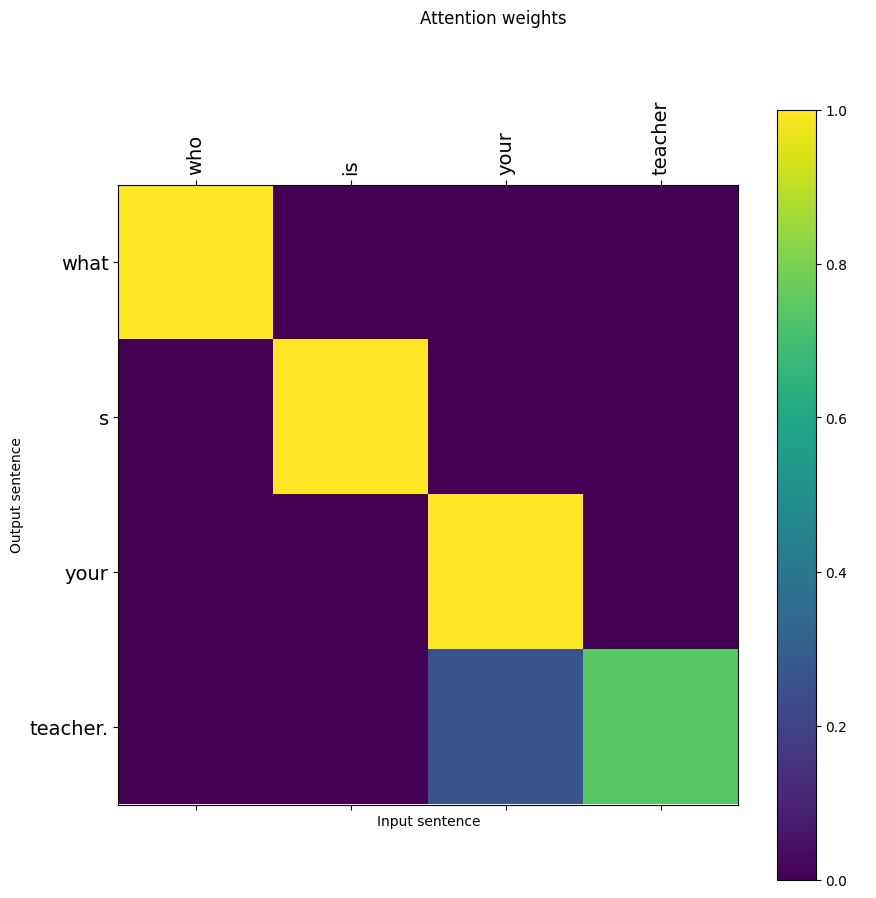

In [188]:
plot_attention(attentions, "who is your teacher " , " what s your teacher.")

In [163]:
import nltk
BLEUscore = nltk.translate.bleu_score.sentence_bleu([" what s your teacher."],  "who is your teacher .")

print("BLEUscore=",BLEUscore*100,"%")

BLEUscore= 70.314524280055 %


['tom', 'is', 'proud', 'of', 'his', 'his', '.', '<EOS>']


C:\Users\mesbahi\AppData\Local\Temp\ipykernel_5200\1908748920.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
C:\Users\mesbahi\AppData\Local\Temp\ipykernel_5200\1908748920.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


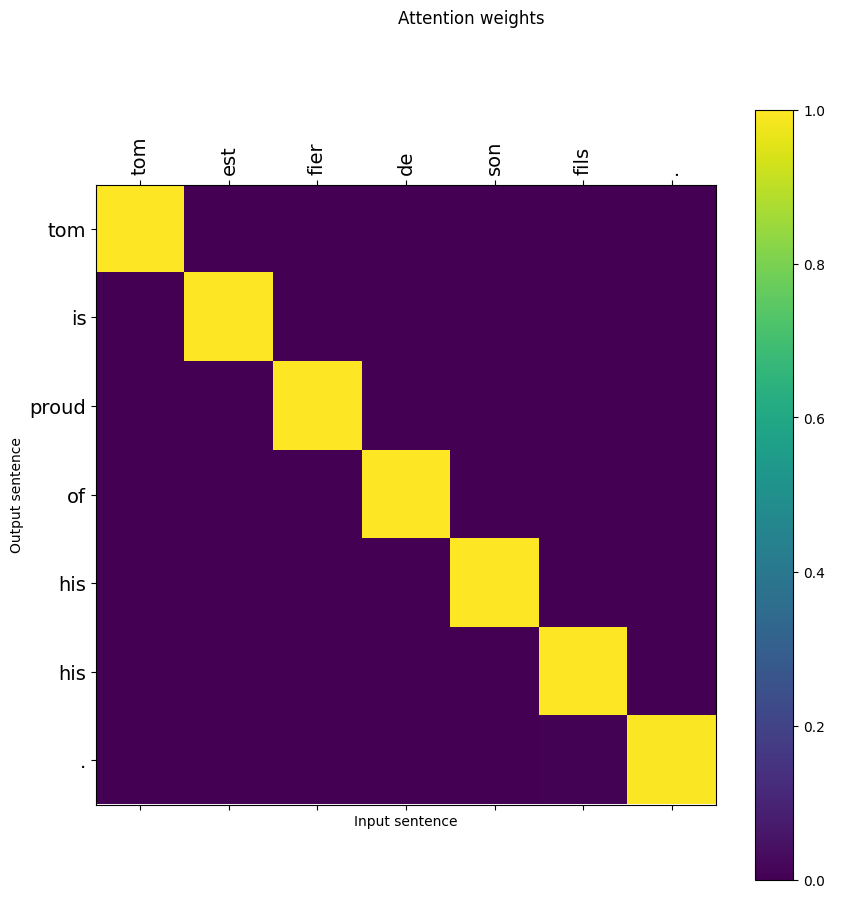

In [189]:
output_words, attentions = modele_evaluation.forward("tom est fier de son fils .")
print(output_words)
plot_attention(attentions, "tom est fier de son fils ." , "tom is proud of his his .")

In [162]:
BLEUscore = nltk.translate.bleu_score.sentence_bleu(["tom is proud of his son ."],  "tom is proud of his his .")

print("BLEUscore=",BLEUscore*100,"%")

BLEUscore= 82.51717906224465 %


In [4]:
BLEUscore = nltk.translate.bleu_score.sentence_bleu(["No matter how much you try to convince people that chocolate is vanilla, it'll still be chocolate, even though you may manage to convince yourself and a few others that it's vanilla."],  "no time how much you shouldve convince people chocolate, itll still be chocolate, take remember to convince you and a few others thats to.")

print("BLEUscore=",BLEUscore*100,"%")

#By calculating the blue score in the article, we have a score of 65% which is relatively the same as ours

BLEUscore= 56.31828802385917 %


**Source:**  No matter how much you try to convince people that chocolate is vanilla, it'll still be chocolate, even though you may manage to convince yourself and a few others that it's vanilla.

**Reference:** Peu importe le temps que tu passeras à essayer de convaincre les gens que le chocolat est de la vanille, ça restera toujours du chocolat, même si tu réussis à convaincre toi et quelques autres que c'est de la vanille.

**RNNsearch-50:** no time how much you shouldve convince people chocolate, itll still be chocolate, take remember to convince you and a few others thats to.

**Google Translate:** No matter how much time you spend trying to convince people that chocolate is vanilla, it's still chocolate, even if you manage to convince yourself and a few others that it's vanilla.

